In [1]:
# Time Series Analysis

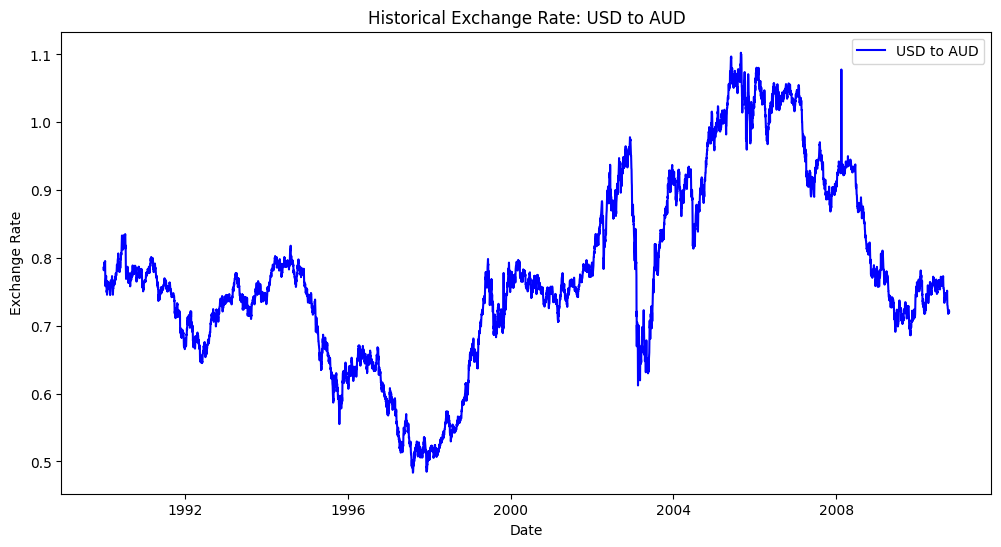

### ADF Test Results ###
ADF Statistic: -1.6650
p-value: 0.4492
Data is non-stationary (Needs Differencing)
ADF Statistic: -1.6650
p-value: 0.4492
Data is non-stationary (Needs Differencing)


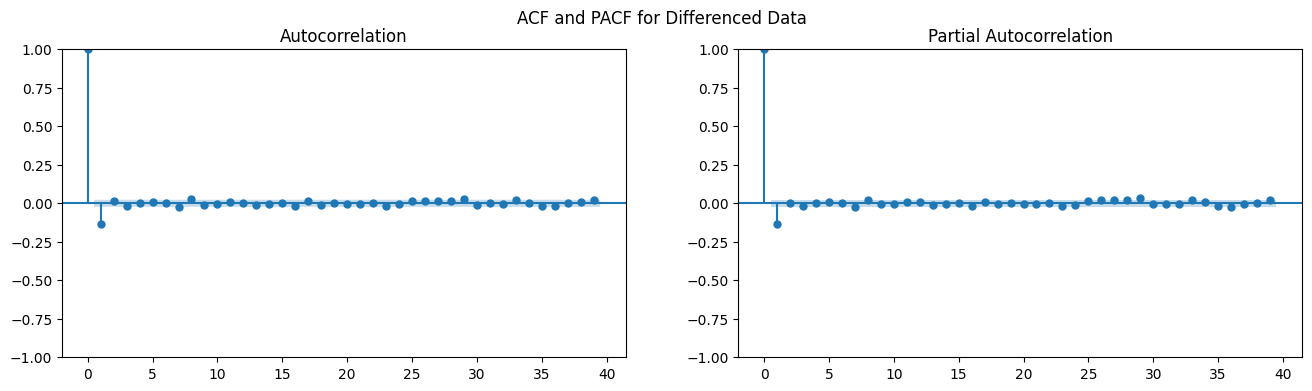

c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 15 Jan 2026   AIC                         -56102.322
Time:                        14:08:03   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



### Grid Search Parameter Optimization for Exponential Smoothing ###


c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\

Best Parameters: alpha=0.20, beta=0.06
Best RMSE: 0.0082


c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Shreyas Mahale\


--- ARIMA Metrics ---
MAE: 0.0135
RMSE: 0.0166
MAPE: 1.86%

--- Exponential Smoothing (Default) Metrics ---
MAE: 0.0134
RMSE: 0.0165
MAPE: 1.85%

--- Exponential Smoothing (Optimized) Metrics ---
MAE: 0.0070
RMSE: 0.0082
MAPE: 0.95%


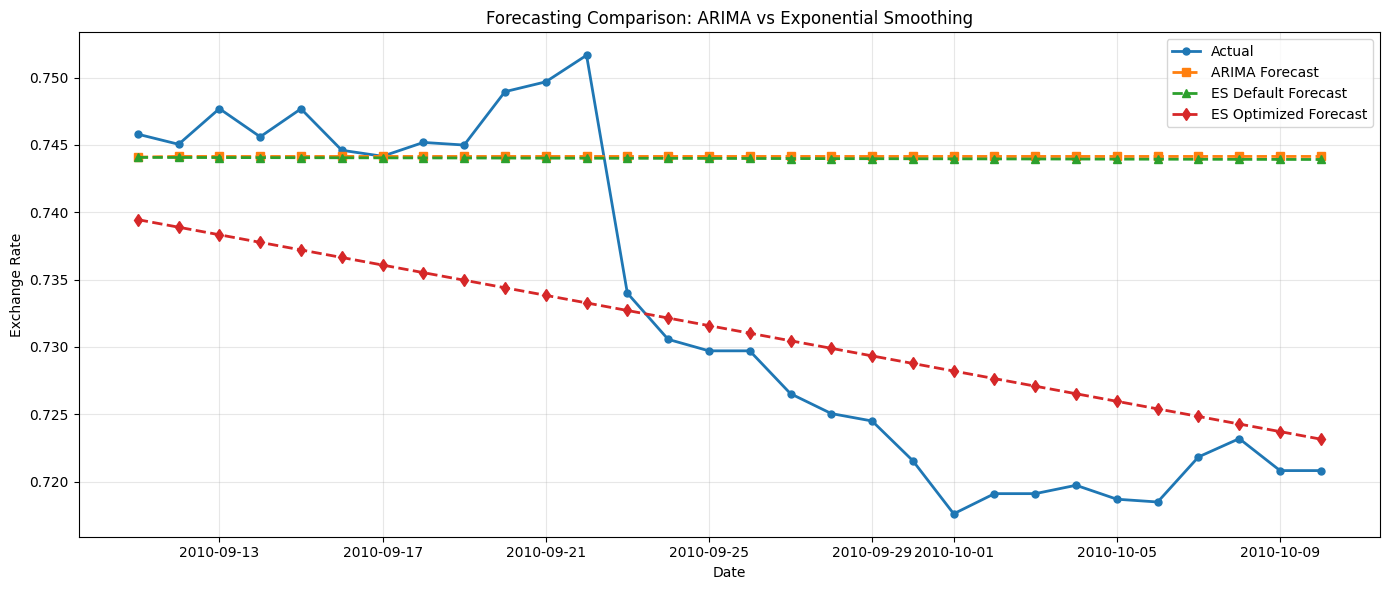

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Data Loading & Exploration ---
df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/Timeseries/Timeseries/exchange_rate.csv")
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

# Plotting the Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], color='blue', label='USD to AUD')
plt.title('Historical Exchange Rate: USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# --- 2. Stationarity Check (ADF Test) ---
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary (Needs Differencing)")

print("### ADF Test Results ###")
check_stationarity(df['Ex_rate'])

# If non-stationary, difference the data
df_diff = df['Ex_rate'].diff().dropna()

# --- 3. ARIMA Parameter Selection (ACF/PACF) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
plt.suptitle('ACF and PACF for Differenced Data')
plt.show()

# --- 4. Building ARIMA Model ---
# Based on plots, let's assume p=1, d=1, q=1 as a starting point
model_arima = ARIMA(df['Ex_rate'], order=(1, 1, 1))
results_arima = model_arima.fit()
print(results_arima.summary())

# Forecasting
forecast_steps = 30
forecast_arima = results_arima.get_forecast(steps=forecast_steps).predicted_mean

# --- 5. Exponential Smoothing (Holt-Winters) ---
# We use additive trend as currency usually shows a linear trend over short periods
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
results_es = model_es.fit()
forecast_es = results_es.forecast(forecast_steps)

# --- 5a. Grid Search Parameter Optimization for Exponential Smoothing ---
print("\n### Grid Search Parameter Optimization for Exponential Smoothing ###")

train = df['Ex_rate'][:-30]
test = df['Ex_rate'][-30:]

# Define parameter grid for Grid Search
alpha_values = np.arange(0.1, 1.0, 0.1)  # Smoothing level
beta_values = np.arange(0.01, 0.3, 0.05)  # Smoothing trend

best_rmse = float('inf')
best_params = None
best_model_es = None

# Grid Search
for alpha in alpha_values:
    for beta in beta_values:
        try:
            # Fit model with current parameters
            model = ExponentialSmoothing(train, trend='add', initialization_method='estimated')
            fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
            
            # Forecast on test set
            forecast = fitted_model.forecast(steps=len(test))
            
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test, forecast))
            
            # Update best parameters if current RMSE is lower
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'alpha': alpha, 'beta': beta}
                best_model_es = fitted_model
        except:
            continue

print(f"Best Parameters: alpha={best_params['alpha']:.2f}, beta={best_params['beta']:.2f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Refit using best parameters on full training data for final evaluation
final_es_model = ExponentialSmoothing(train, trend='add', initialization_method='estimated')
results_es_optimized = final_es_model.fit(smoothing_level=best_params['alpha'], 
                                          smoothing_trend=best_params['beta'], 
                                          optimized=False)
eval_es_optimized = results_es_optimized.forecast(steps=30)

# --- 6. Evaluation ---
# For demonstration, we'll evaluate on the last 30 days of existing data

# Refit on training for proper evaluation
eval_arima = ARIMA(train, order=(1,1,1)).fit().forecast(steps=30)
eval_es = ExponentialSmoothing(train, trend='add').fit().forecast(steps=30)

def calculate_metrics(actual, pred, name):
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    print(f"\n--- {name} Metrics ---")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")

calculate_metrics(test, eval_arima, "ARIMA")
calculate_metrics(test, eval_es, "Exponential Smoothing (Default)")
calculate_metrics(test, eval_es_optimized, "Exponential Smoothing (Optimized)")

# --- 7. Visualization of Results ---
plt.figure(figsize=(14, 6))
plt.plot(test.index, test.values, 'o-', label='Actual', linewidth=2, markersize=5)
plt.plot(test.index, eval_arima.values, 's--', label='ARIMA Forecast', linewidth=2)
plt.plot(test.index, eval_es.values, '^--', label='ES Default Forecast', linewidth=2)
plt.plot(test.index, eval_es_optimized.values, 'd--', label='ES Optimized Forecast', linewidth=2)
plt.title('Forecasting Comparison: ARIMA vs Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
